In [99]:
!jt -t monokai -f fira -fs 13 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 95% -T

In [ ]:
print(hello)

In [105]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [113]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [13]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [104]:
import seaborn as sns 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


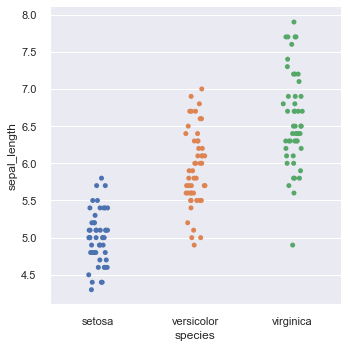

In [103]:
sns.catplot(x='species', y='sepal_length', data=iris)

In [16]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

sns.set(style = 'darkgrid')

In [17]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [18]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [19]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [20]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [21]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [22]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [23]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [24]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(mpg_df.hp.str.isdigit())

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [25]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [26]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [27]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 

In [28]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [29]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [30]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [31]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      int64
origin_asia         int64
origin_europe       int64
dtype: object

In [32]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')


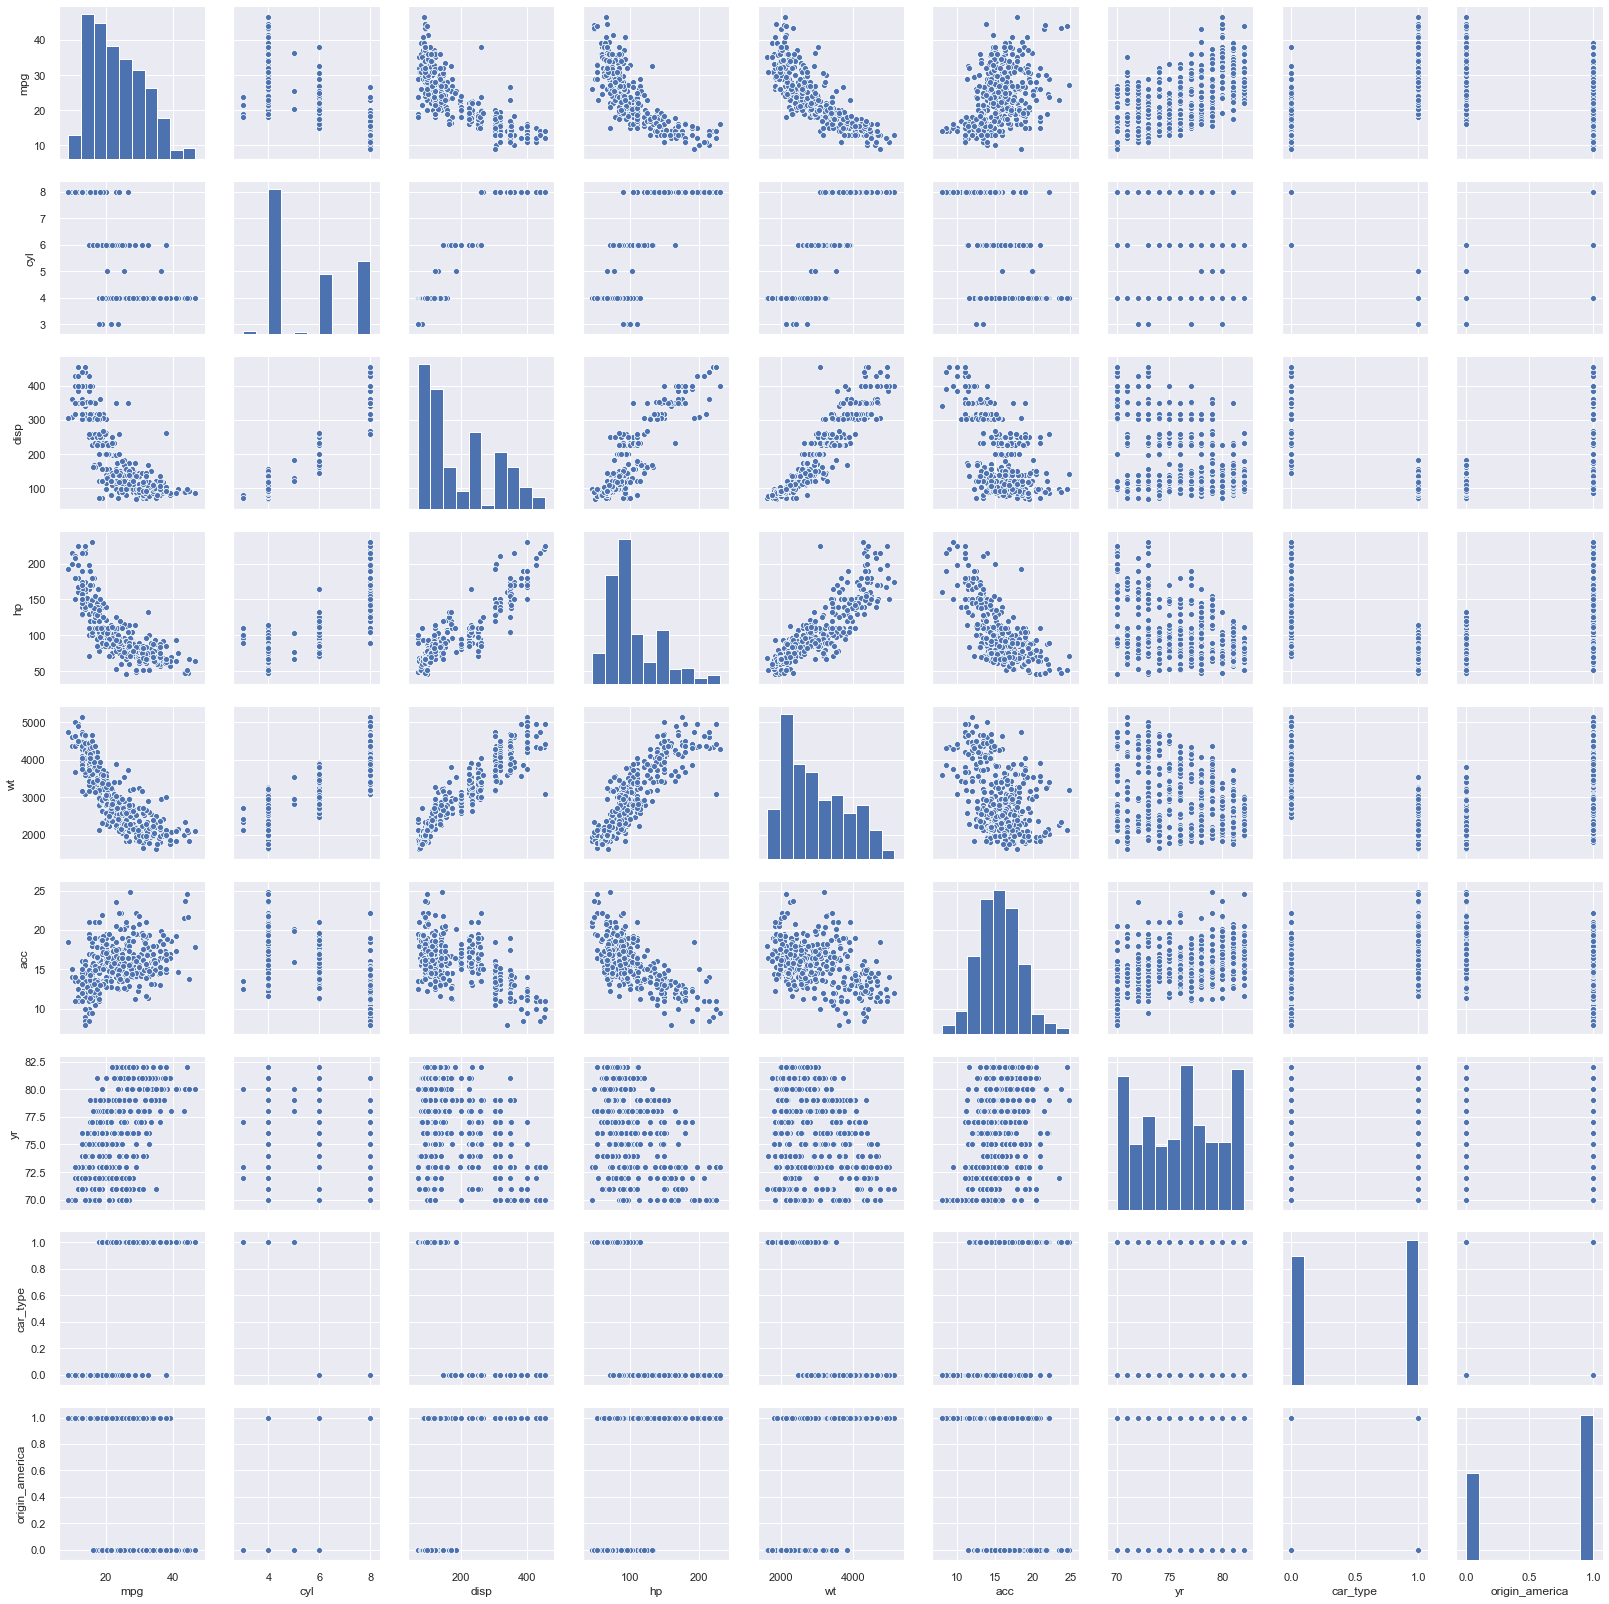

In [33]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

#sns.pairplot(mpg_df_attr, diag_kind='kde')

sns.pairplot(mpg_df_attr)

In [34]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mpg' vs 'yr' surprising to see a positive relation

In [35]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [36]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [37]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [38]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.356367528362071
The coefficient for disp is 0.025768902919332013
The coefficient for hp is -0.04153720627952424
The coefficient for wt is -0.006721330756425071
The coefficient for acc is 0.09824155121835824
The coefficient for yr is 0.8044483285786859
The coefficient for car_type is 5.663662057410236
The coefficient for origin_america is -1.5663615462949967
The coefficient for origin_asia is 0.7858042120205637
The coefficient for origin_europe is 0.780557334274432


In [40]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -29.395622550671085


In [41]:
# we can write our linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9

In [42]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8575776228871497

In [43]:
# So the model explains 84.4% of the variability in Y using X

In [44]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [45]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use statsmodel, a library that gives results similar to
# what you obtain in R language
data_train = pd.concat([X_train, y_train], axis=1)

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+origin_america+origin_asia+origin_europe', data = data_train).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sat, 04 Jan 2020   Prob (F-statistic):          1.22e-101
Time:                        10:48:36   Log-Likelihood:                -787.57
No. Observations:                 298   AIC:                             1593.
Df Residuals:                     289   BIC:                             1626.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -15.8352      4.108     -3.

In [46]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [47]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

2.7931645773747635

In [48]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

In [49]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

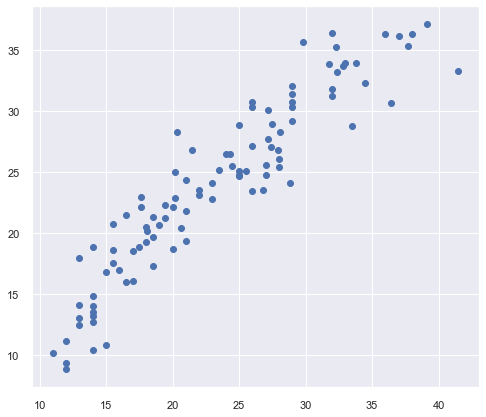

In [50]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [51]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [52]:
!jt -t chesterish

In [53]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [54]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
mpg_df_scaled = preprocessing.scale(mpg_df)

In [55]:
mpg_df_scaled

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.77355903,
        -0.49764335, -0.46196822],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.77355903,
        -0.49764335, -0.46196822]])

In [56]:
#convert the numpy array back into a dataframe 

mpg_df_scaled = pd.DataFrame(mpg_df_scaled, columns=mpg_df.columns)

In [57]:
#browse the contents of the dataframe. Check that all the values are now z scores

mpg_df_scaled

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [58]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_scaled[['mpg']]


In [59]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [60]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.29518827451862334
The coefficient for disp is 0.34377235544447543
The coefficient for hp is -0.20313002050666407
The coefficient for wt is -0.7282388801097294
The coefficient for acc is 0.0346622546064895
The coefficient for yr is 0.3805726133418509
The coefficient for car_type is 0.362108645729595
The coefficient for origin_america is -0.08228452280158759
The coefficient for origin_asia is 0.052370358686413564
The coefficient for origin_europe is 0.04973173878319414


In [62]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train, y_train)

0.8343520392348843

In [63]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_train)-y_train)**2)

In [64]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.4137714265117296

In [65]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

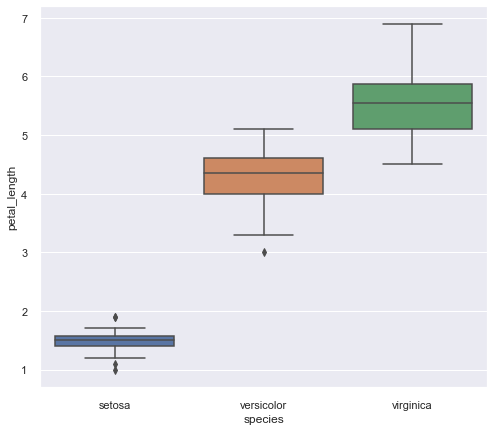

In [92]:
sns.boxplot(x='species', y='petal_length', data=iris)

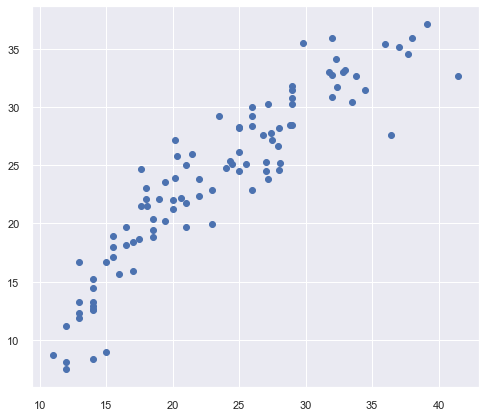

In [90]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [67]:
# -------------------------------------------    ITERATION - 3  ---------------------------------------------- 

In [68]:
# Since "mpg" and "Acc" seem to have very weak correlation. Let us drop "ACC" from the model 
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)
X = X.drop('acc', axis=1)
X = X.drop('origin_america', axis=1)
X = X.drop('origin_asia', axis=1)
X = X.drop('origin_europe', axis=1)
#X = X.drop('yr', axis=1)
X

,cyl,disp,hp,wt,yr,car_type
0,1.498191,1.090604,0.673118,0.630870,-1.627426,-1.062235
1,1.498191,1.503514,1.589958,0.854333,-1.627426,-1.062235
2,1.498191,1.196232,1.197027,0.550470,-1.627426,-1.062235
3,1.498191,1.061796,1.197027,0.546923,-1.627426,-1.062235
4,1.498191,1.042591,0.935072,0.565841,-1.627426,-1.062235
...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,1.621983,0.941412
394,-0.856321,-0.925936,-1.370127,-0.993671,1.621983,0.941412
395,-0.856321,-0.561039,-0.531873,-0.798585,1.621983,0.941412
396,-0.856321,-0.705077,-0.662850,-0.408411,1.621983,0.941412


In [69]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [70]:
# invoke the LinearRegression function and find the bestfit model on training data

#regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for cyl is 0.38589461682819837
The coefficient for disp is 0.1200376054864788
The coefficient for hp is -0.1886758516432922
The coefficient for wt is -0.6871519971618606
The coefficient for yr is 0.36347284745718317
The coefficient for car_type is 0.4047558590086512


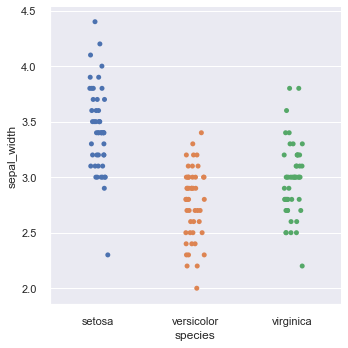

In [101]:
sns.catplot(x='species', y='sepal_width', data=iris)

In [72]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [73]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3668480001208214

In [74]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train, y_train)

0.8240112186045527

In [75]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

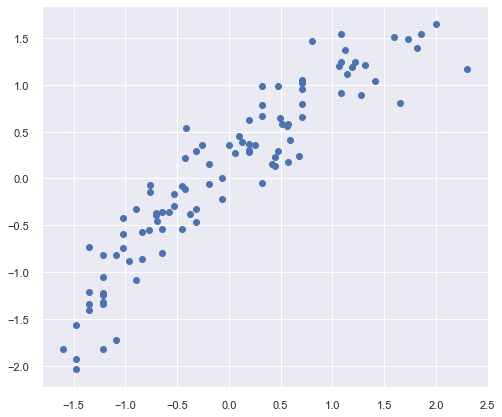

In [76]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [77]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8502963865655869

In [78]:
#---------------------------------------Iteration 4  (try to fit quadratic curves) -------------------------------------------------------

In [79]:
# Since the scatter matrix indicated a non-linear reverse relation between mpg and disp, hp, wt... 
# reflecting that below. Observe the - infront of the disp, hp and wt attributes to indicte negative relation and raised to power 1/2
# may be raised to power 2 to check....
# Convert the year column to age by subtracting the value from year 2000 (anchor)


mpg_df_quadratic = pd.DataFrame([mpg_df["mpg"],mpg_df["cyl"], -mpg_df["disp"]**.5, -mpg_df["hp"]**.5, -mpg_df["wt"]**.5, mpg_df["acc"]]).T
mpg_df_quadratic["age"]= ((2000 - mpg_df["yr"] )- 1900)



In [80]:
mpg_df_quadratic.head()

,mpg,cyl,disp,hp,wt,acc,age
0,18.0,8.0,-17.521415,-11.401754,-59.194594,12.0,30
1,15.0,8.0,-18.708287,-12.845233,-60.770058,11.5,30
2,18.0,8.0,-17.832555,-12.247449,-58.617404,11.0,30
3,16.0,8.0,-17.435596,-12.247449,-58.591808,12.0,30
4,17.0,8.0,-17.378147,-11.832160,-58.728187,10.5,30


In [81]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_quadratic.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_quadratic[['mpg']]



# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [82]:
# invoke the LinearRegression function and find the bestfit model on training data

#regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_train)-y_train)**2)

In [84]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

3.3504053266184672

In [85]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train, y_train)

0.8217682757030094

In [86]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

In [96]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


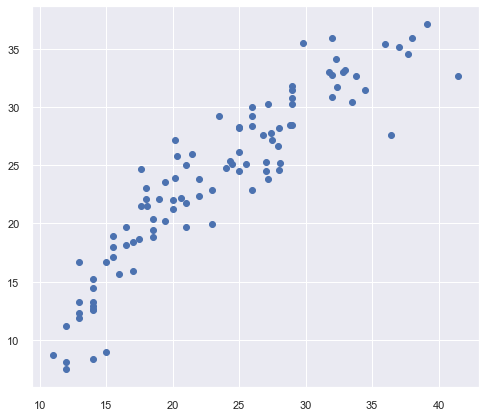

In [87]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [88]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8357779308549521

In [89]:
lm1 = smf.ols(formula= 'mpg ~ cyl-disp^2-hp^2+wt^2+acc+yr+origin_america+origin_asia+origin_europe', data = data_train).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sat, 04 Jan 2020   Prob (F-statistic):          7.18e-102
Time:                        10:48:39   Log-Likelihood:                -792.55
No. Observations:                 298   AIC:                             1599.
Df Residuals:                     291   BIC:                             1625.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.9639      3.816     -4.